# **AD654 Team Semester Project**
- Group Name: Echo
- Group Members: Nauryzbay Auyeskhanov, Pranjul Garg, Pratham Kabra, Marco Perez Garcia, Yani Tao, Furong Wang

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import uuid

## **I. Summary Stats**

### **Dataset Summary**

In [3]:
df = pd.read_csv("/Users/prathamkabra/Downloads/caribbean_ports.csv")
df.describe()

,port_id,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
count,50.00000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,18.470906,-72.804902,7.061286e+05,10.706200,4.440000,8.19820,5.980000,0.764000,112.894200,0.566200
std,14.57738,5.560868,7.250157,4.517732e+05,5.430777,2.865417,1.27086,3.040475,0.165603,58.994124,0.284461
min,1.00000,10.096600,-84.364500,7.195900e+04,-3.500000,1.000000,6.12000,1.000000,0.510000,-45.000000,0.110000
25%,13.25000,13.441650,-79.151925,2.761048e+05,5.802500,2.250000,7.37250,4.000000,0.640000,56.592500,0.350000
50%,25.50000,18.832350,-72.470400,6.993720e+05,12.055000,4.000000,8.27000,6.000000,0.790000,117.295000,0.570000
75%,37.75000,23.696650,-66.013100,1.065037e+06,14.460000,6.000000,9.05000,9.000000,0.897500,163.442500,0.795000
max,50.00000,27.270500,-61.757600,1.492646e+06,18.920000,15.000000,12.50000,10.000000,1.200000,197.660000,0.990000


### **Handling Missing Data and Impossible Values**

In [4]:
df.head(5)

,port_id,port_name,country_or_territory,region,port_type,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
0,1,Cozumel,Mexico,Western,Private,23.7406,-66.7748,187848,13.75,6,8.23,2,0.82,175.22,0.99
1,2,Costa Maya,Mexico,Western,Eco/Nature,13.4943,-65.7182,667075,13.77,3,9.74,10,0.52,100.07,0.78
2,3,Progreso,Mexico,Western,Major,18.9991,-83.1489,177948,12.11,9,8.78,3,0.69,156.40,0.44
3,4,Belize City,Belize,Western,Private,20.3673,-76.0384,452690,4.53,4,12.50,1,0.81,157.05,0.18
4,5,Roatán,Honduras,Western,Private,10.8129,-82.1033,549046,17.20,1,6.39,8,0.75,43.05,0.80


In [5]:
print(df.isna().sum().sort_values(ascending=False))

port_id                          0
port_name                        0
country_or_territory             0
region                           0
port_type                        0
latitude                         0
longitude                        0
avg_annual_visitors              0
avg_port_fee_usd                 0
local_attractions_score          0
avg_customer_satisfaction        0
excursion_variety_index          0
avg_disembark_rate               0
avg_shore_spend_per_passenger    0
seasonality_score                0
dtype: int64


In [6]:
# Check for invalid avg_port_fee_usd
print(df[df['avg_port_fee_usd'] < 0])

# Check for invalid local_attractions_score
print(df[(df['local_attractions_score'] < 1) | (df['local_attractions_score'] > 10)])

# Check for invalid avg_customer_satisfaction
print(df[(df['avg_customer_satisfaction'] < 1) | (df['avg_customer_satisfaction'] > 10)])

# Check for invalid avg_disembark_rate
print(df[(df['avg_disembark_rate'] < 0) | (df['avg_disembark_rate'] > 1)])

# Check for invalid avg_shore_spend_per_passenger
print(df[df['avg_shore_spend_per_passenger'] < 0])

    port_id port_name country_or_territory   region port_type  latitude  \
21       22   Antigua  Antigua and Barbuda  Eastern     Major   15.4549   

    longitude  avg_annual_visitors  avg_port_fee_usd  local_attractions_score  \
21   -71.9317               815313              -3.5                        3   

    avg_customer_satisfaction  excursion_variety_index  avg_disembark_rate  \
21                       9.19                        9                0.95   

    avg_shore_spend_per_passenger  seasonality_score  
21                          82.52               0.88  
    port_id   port_name country_or_territory   region port_type  latitude  \
15       16  St. Thomas    US Virgin Islands  Eastern     Major   12.1357   

    longitude  avg_annual_visitors  avg_port_fee_usd  local_attractions_score  \
15   -82.0101               489792             14.75                       15   

    avg_customer_satisfaction  excursion_variety_index  avg_disembark_rate  \
15                     

In [7]:
def clean_group_mean(df, column, valid_min, valid_max):
    valid = df[(df[column] >= valid_min) & (df[column] <= valid_max)]
    return valid.groupby('country_or_territory')[column].transform('mean')

# 1. avg_port_fee_usd (should be >= 0)
mask = df['avg_port_fee_usd'] < 0
valid_means = clean_group_mean(df, 'avg_port_fee_usd', 0, float('inf'))
df.loc[mask, 'avg_port_fee_usd'] = valid_means[mask]

# 2. local_attractions_score (1–10)
mask = (df['local_attractions_score'] < 1) | (df['local_attractions_score'] > 10)
valid_means = clean_group_mean(df, 'local_attractions_score', 1, 10)
df.loc[mask, 'local_attractions_score'] = valid_means[mask]

# 3. avg_customer_satisfaction (1–10)
mask = (df['avg_customer_satisfaction'] < 1) | (df['avg_customer_satisfaction'] > 10)
valid_means = clean_group_mean(df, 'avg_customer_satisfaction', 1, 10)
df.loc[mask, 'avg_customer_satisfaction'] = valid_means[mask]

# 4. avg_disembark_rate (0–1)
mask = (df['avg_disembark_rate'] < 0) | (df['avg_disembark_rate'] > 1)
valid_means = clean_group_mean(df, 'avg_disembark_rate', 0, 1)
df.loc[mask, 'avg_disembark_rate'] = valid_means[mask]

# 5. avg_shore_spend_per_passenger (>= 0)
mask = df['avg_shore_spend_per_passenger'] < 0
valid_means = clean_group_mean(df, 'avg_shore_spend_per_passenger', 0, float('inf'))
df.loc[mask, 'avg_shore_spend_per_passenger'] = valid_means[mask]

In [8]:
df.describe()

,port_id,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
count,50.00000,50.000000,50.000000,5.000000e+01,49.000000,49.000000,49.000000,50.000000,49.000000,49.000000,50.000000
mean,25.50000,18.470906,-72.804902,7.061286e+05,10.996122,4.224490,8.110408,5.980000,0.755102,116.116531,0.566200
std,14.57738,5.560868,7.250157,4.517732e+05,5.081090,2.451745,1.120417,3.040475,0.154773,54.980235,0.284461
min,1.00000,10.096600,-84.364500,7.195900e+04,3.090000,1.000000,6.120000,1.000000,0.510000,26.900000,0.110000
25%,13.25000,13.441650,-79.151925,2.761048e+05,5.960000,2.000000,7.350000,4.000000,0.640000,76.310000,0.350000
50%,25.50000,18.832350,-72.470400,6.993720e+05,12.110000,4.000000,8.230000,6.000000,0.790000,121.170000,0.570000
75%,37.75000,23.696650,-66.013100,1.065037e+06,14.520000,6.000000,8.960000,9.000000,0.890000,163.530000,0.795000
max,50.00000,27.270500,-61.757600,1.492646e+06,18.920000,9.000000,9.960000,10.000000,1.000000,197.660000,0.990000


During the data validation process, no missing (null) values were found across any columns in the caribbean_ports dataset. However, upon further inspection using summary statistics, several variables contained impossible values outside their expected ranges, such as negative port fees, customer satisfaction scores above 10, and disembarkation rates exceeding 1. To address these issues, invalid entries were imputed by replacing them with the mean of valid values from the same country_or_territory. This ensured that the corrections respected the appropriate business logic while maintaining consistency within each country group.

### **Summary Statistics**

In [9]:
region_visitors = df.groupby('region')['avg_annual_visitors'].mean()
print(region_visitors)

region
Bahamas     693904.875000
Eastern     766951.812500
Southern    812553.545455
Western     569725.000000
Name: avg_annual_visitors, dtype: float64


Ports in the Southern Caribbean attract the highest average number of annual visitors (over 812,000), followed by the Eastern Caribbean. In contrast, the Bahamas and Western regions receive significantly fewer visitors on average.

In [10]:
port_type_spend = df.groupby('port_type')['avg_shore_spend_per_passenger'].mean()
print(port_type_spend)

port_type
Boutique      119.862727
Eco/Nature    117.466875
Major         123.653000
Private       104.601667
Name: avg_shore_spend_per_passenger, dtype: float64


Passengers tend to spend the most at Major ports (123.65 USD on average), followed closely by Boutique and Eco/Nature ports. Private ports show the lowest average shore spending at about 93.09 USD per passenger.

In [11]:
pivot_cust_sat = df.pivot_table(values='avg_customer_satisfaction', index='region', columns='port_type', aggfunc='mean')
print(pivot_cust_sat)

port_type  Boutique  Eco/Nature   Major   Private
region                                           
Bahamas    9.205000         NaN  6.5600  8.414000
Eastern    8.386667    8.638333  7.9740  8.105000
Southern   7.817500    7.804000     NaN  8.585000
Western    7.755000    7.810000  8.5375  7.043333


Customer satisfaction is highest at Boutique ports across all regions, especially in the Bahamas with an average score of 9.21. Major ports generally receive lower satisfaction scores compared to Boutique and Private ports. The missing values in the pivot table occur because there are no Eco/Nature ports in the Bahamas and no Major ports in the Southern region.

In [12]:
top_satisfaction = df[['country_or_territory', 'avg_customer_satisfaction']].sort_values(by='avg_customer_satisfaction', ascending=False).head(5)
print(top_satisfaction)

      country_or_territory  avg_customer_satisfaction
6                 Honduras                       9.96
1                   Mexico                       9.74
18  British Virgin Islands                       9.65
25                 Grenada                       9.56
9                  Bahamas                       9.51


Honduras stands out with the highest average customer satisfaction score (9.96), followed by Mexico, the British Virgin Islands, Grenada, and the Bahamas, all with scores above 9.5. These ports appear to offer the most positive experiences for cruise passengers.

In [13]:
top_attractions = df[['port_name', 'country_or_territory', 'local_attractions_score']] \
    .sort_values(by='local_attractions_score', ascending=False) \
    .head(5)

print(top_attractions)

        port_name country_or_territory  local_attractions_score
2        Progreso               Mexico                      9.0
37   Port Antonio              Jamaica                      9.0
10  Half Moon Cay              Bahamas                      8.0
39      Cabo Rojo          Puerto Rico                      8.0
9          Bimini              Bahamas                      8.0


Progreso and Port Antonio stand out with the highest local attractions scores (9.0), followed closely by Half Moon Cay, St. Lucia, and Bimini with scores of 8.0. This suggests these ports offer a broader range of attractions compared to other Caribbean destinations.

In [14]:
country_summary = df.groupby('country_or_territory').agg(
    total_annual_visitors=('avg_annual_visitors', 'sum'),
    avg_customer_satisfaction=('avg_customer_satisfaction', 'mean')
).reset_index()

country_summary = country_summary.sort_values(by='avg_customer_satisfaction', ascending=False)

print(country_summary)

      country_or_territory  total_annual_visitors  avg_customer_satisfaction
6   British Virgin Islands                1555934                   9.560000
11                 Grenada                 831239                   9.560000
22       US Virgin Islands                 579145                   9.240000
0      Antigua and Barbuda                 815313                   9.190000
3                 Barbados                 790976                   9.180000
15                  Mexico                1032871                   8.916667
20               St. Lucia                 641460                   8.810000
9                 Dominica                 466880                   8.600000
4                   Belize                 953959                   8.460000
2                  Bahamas                5551239                   8.380000
1                    Aruba                 275281                   8.310000
13                Honduras                1790048                   8.280000

British Virgin Islands and Grenada report the highest average customer satisfaction scores, each achieving 9.56. Despite not having the highest visitor volumes, these destinations offer experiences that passengers rate extremely highly. In contrast, larger markets such as the Dominican Republic and Venezuela attract significant numbers of visitors but show noticeably lower satisfaction levels, suggesting that higher traffic does not always translate into better passenger experiences.

### **Insights and Findings**

The exploratory analysis indicates that cruise passengers are most attracted to ports offering a combination of strong local attractions and specialized experiences, such as Boutique ports. Regions with higher visitor volumes, like the Southern and Eastern Caribbean, do not necessarily correlate with higher customer satisfaction, suggesting that passenger experience is more closely tied to port characteristics than to overall traffic. Ports classified as Major drive the highest shore spending, yet their satisfaction scores tend to be lower compared to Boutique and Private ports, highlighting a potential trade-off between economic gain and visitor experience. At the country level, smaller territories such as the British Virgin Islands and Grenada report the highest customer satisfaction scores, while larger markets like the Dominican Republic and Venezuela show noticeably lower ratings. Furthermore, the identification and correction of invalid data ensured that conclusions were based on consistent and realistic figures. The results suggest that enhancing local attractions and improving specialized experiences could be more effective strategies for ports aiming to increase both visitor satisfaction and economic impact. However, it is important to note that the dataset had some initial inconsistencies, including impossible values for several key variables, which required careful correction. In addition, not all region and port type combinations were represented, potentially limiting the generalizability of some findings across the broader Caribbean cruise market.

Based on the data, Lobster Land should prioritize partnering with or operating in Boutique ports, as they consistently receive the highest customer satisfaction scores across all regions. Although Major ports attract higher spending per passenger, Boutique ports strike a balance between strong spending and a superior passenger experience—an important factor for brand positioning. The Bahamas and Eastern Caribbean also stand out as attractive regions due to high visitor volumes and strong satisfaction scores. Additionally, ports like Progreso and Port Antonio, with top local attractions scores, suggest strong tourism value and engagement opportunities. Focusing on high-satisfaction, mid-to-high-spend destinations will help Lobster Land deliver a premium yet enjoyable cruise experience from day one.

## **II. Segmentation and Targeting**

### **Data Loading and Exploration**

In [15]:
df = pd.read_csv("/Users/prathamkabra/Downloads/caribbean_ports.csv")
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
port_id                          0
port_name                        0
country_or_territory             0
region                           0
port_type                        0
latitude                         0
longitude                        0
avg_annual_visitors              0
avg_port_fee_usd                 0
local_attractions_score          0
avg_customer_satisfaction        0
excursion_variety_index          0
avg_disembark_rate               0
avg_shore_spend_per_passenger    0
seasonality_score                0
dtype: int64


In [16]:
df.describe()

,port_id,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
count,50.00000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,18.470906,-72.804902,7.061286e+05,10.706200,4.440000,8.19820,5.980000,0.764000,112.894200,0.566200
std,14.57738,5.560868,7.250157,4.517732e+05,5.430777,2.865417,1.27086,3.040475,0.165603,58.994124,0.284461
min,1.00000,10.096600,-84.364500,7.195900e+04,-3.500000,1.000000,6.12000,1.000000,0.510000,-45.000000,0.110000
25%,13.25000,13.441650,-79.151925,2.761048e+05,5.802500,2.250000,7.37250,4.000000,0.640000,56.592500,0.350000
50%,25.50000,18.832350,-72.470400,6.993720e+05,12.055000,4.000000,8.27000,6.000000,0.790000,117.295000,0.570000
75%,37.75000,23.696650,-66.013100,1.065037e+06,14.460000,6.000000,9.05000,9.000000,0.897500,163.442500,0.795000
max,50.00000,27.270500,-61.757600,1.492646e+06,18.920000,15.000000,12.50000,10.000000,1.200000,197.660000,0.990000


In [17]:
# Remove impossible values
df = df[df['avg_annual_visitors'] >= 0]
df = df[df['avg_port_fee_usd'] >= 0]
df = df[df['avg_shore_spend_per_passenger'] >= 0]
df = df[(df['avg_customer_satisfaction'] >= 1) & (df['avg_customer_satisfaction'] <= 10)]
df = df[(df['local_attractions_score'] >= 1) & (df['local_attractions_score'] <= 10)]
df = df[(df['avg_disembark_rate'] >= 0) & (df['avg_disembark_rate'] <= 1)]

In [18]:
# Summary statistics for numeric variables
numeric_cols = [
    'avg_annual_visitors', 'avg_port_fee_usd', 'local_attractions_score',
    'avg_customer_satisfaction', 'excursion_variety_index', 'avg_disembark_rate',
    'avg_shore_spend_per_passenger', 'seasonality_score', 'latitude', 'longitude'
]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])

print("\nSummary Statistics for Numeric Variables after Cleaning:")
df[numeric_cols].describe()


Summary Statistics for Numeric Variables after Cleaning:


,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score,latitude,longitude
count,4.500000e+01,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,7.345383e+05,11.390222,4.155556,8.076889,6.022222,0.753556,113.094444,0.567556,18.673378,-72.370378
std,4.626601e+05,4.916183,2.485920,1.114352,2.927059,0.154068,55.055792,0.276793,5.589324,7.445726
min,7.195900e+04,3.090000,1.000000,6.120000,1.000000,0.510000,26.900000,0.110000,10.096600,-84.364500
25%,2.752810e+05,6.850000,2.000000,7.350000,4.000000,0.640000,50.020000,0.350000,13.477500,-79.280000
50%,7.909760e+05,12.330000,4.000000,8.170000,6.000000,0.770000,113.420000,0.570000,18.999100,-71.516400
75%,1.070545e+06,14.520000,6.000000,8.810000,9.000000,0.890000,163.180000,0.780000,23.740600,-65.725800
max,1.492646e+06,18.920000,9.000000,9.960000,10.000000,1.000000,197.660000,0.990000,27.270500,-61.757600


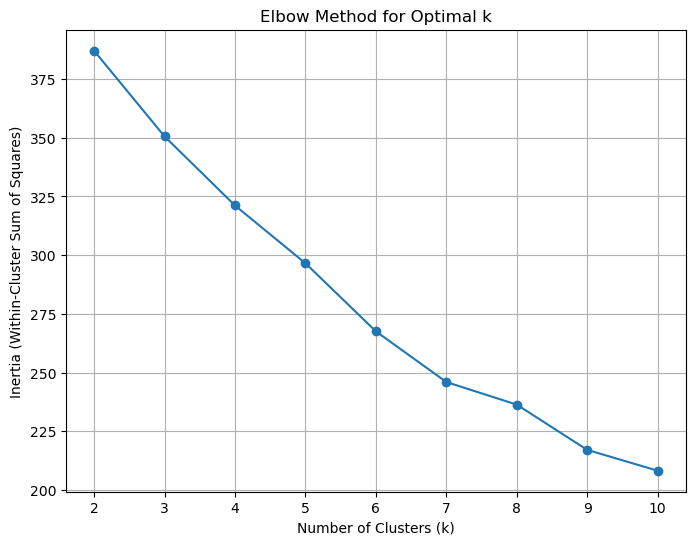

In [19]:
# Elbow Method to find optimal k
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

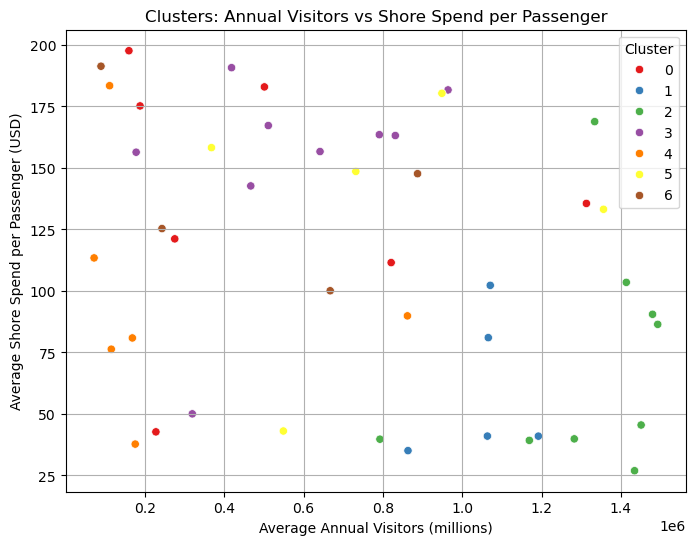

In [20]:
final_kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
df['cluster'] = final_kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_annual_visitors', y='avg_shore_spend_per_passenger', hue='cluster', palette='Set1', data=df)
plt.title('Clusters: Annual Visitors vs Shore Spend per Passenger')
plt.xlabel('Average Annual Visitors (millions)')
plt.ylabel('Average Shore Spend per Passenger (USD)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

*As per the elbow chart, the optimal value seems to be 7, but after our scatter plot of the cluster, the plots didn't seems to occupy these many clusters, as we can see the cluster 6 isn't able to show these many data points to so some analysis on that. hence, for this analysis, we will be using k as 6.*

In [21]:
final_kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['cluster'] = final_kmeans.fit_predict(X_scaled)

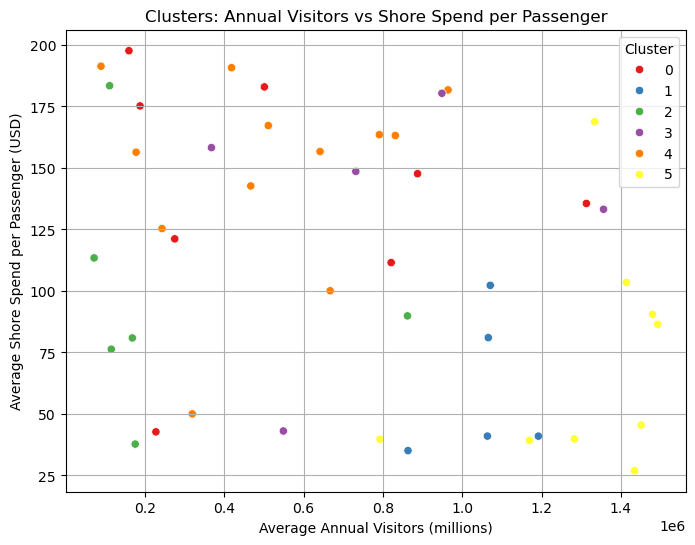

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_annual_visitors', y='avg_shore_spend_per_passenger', hue='cluster', palette='Set1', data=df)
plt.title('Clusters: Annual Visitors vs Shore Spend per Passenger')
plt.xlabel('Average Annual Visitors (millions)')
plt.ylabel('Average Shore Spend per Passenger (USD)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### **Analysis on the Clusters**
**Cluster 0 (Red):**
- ***Position:** Mostly in the upper-left quadrant, with a few points extending toward the middle.*
- ***Visitor Range:** 0.2 to 0.6 million, with one outlier at ~0.8 and one at 1.3 million.*
- ***Shore Spend Range:** 125 to 200 USD, with most points above 100 USD.*
- ***Insights:** This cluster has low visitor numbers but very high shore spend, indicating exclusive, high-end destinations. These ports likely cater to affluent travelers willing to spend significantly on shore experiences, fitting well with a luxury cruise line. The low visitor volume suggests less crowded ports, enhancing the exclusivity.*

**Cluster 1 (Blue):**
- ***Position:** Concentrated in the bottom-right.*
- ***Visitor Range:** 0.8 to 1.2 million.*
- ***Shore Spend Range:** 50 to 75 USD, with most points around 50 USD and one outlier near 100 USD.*
- ***Insights:**  TThese are mass-market destinations with substantial foot traffic but lower per-passenger spending. Suitable for budget-friendly cruises or those aiming to upsell shore excursions to increase revenue.*
  
**Cluster 2 (Green):**
- ***Position:** Scattered in the lower-left.*
- ***Visitor Range:** near 0.2 million*
- ***Shore Spend Range**: 25 to 100 USD, with most points around 25 to 50 USD.*
- ***Insights:** These are smaller, less crowded ports with moderate spending, not high-traffic tourist spots*

**Cluster 3 (Purple):**
- ***Position:** Mostly in the upper middle.*
- ***Visitor Range:** 0.2 to 0.8 million*
- ***Shore Spend Range:** 150 to 175 USD, with most points around 150 USD.*
- ***Insights:** hese are emerging luxury destinations with high spending and moderate visitor numbers, ideal for luxury travelers.*

**Cluster 4 (Orange):**
- ***Position:** Scattered middle to upper-middle*
- ***Visitor Range:** 0.2 to 0.9 million*
- ***Shore Spend Range:** 125 to 200 USD*
- ***Insights:** These ports have low visitor numbers with a wide range of spending behaviors, indicating a mix of underdeveloped or niche destinations.*

**Cluster 5 (Yellow):**
- ***Position:** Scattered across bottom right*
- ***Visitor Range:** 0.8 to 1.6 million, with most points between 1.2and 1.6 million.*
- ***Shore Spend Range**:  25 to 100 USD*
- ***Insights:** This cluster has higher visitor numbers and very low spend, indicating that visitors are budget friendly.*


### **Clustering Name as per the Cluster Analysis**

**Cluster 0 (Red): Elite Coastal Gems**
- *Reflects the exclusive, high-end destinations with low visitor numbers (0.2 to 0.6 million, outliers at 0.8 and 1.3 million) and very high shore spend (125 to 200 USD), fitting a luxury cruise line.*
  
**Cluster 1 (Blue): Crowded Budget Ports**
- *Captures the mass-market destinations with substantial foot traffic (0.8 to 1.2 million visitors) and lower per-passenger spending (50 to 75 USD, outlier at 100 USD), suitable for budget-friendly cruises.*
  
**Cluster 2 (Green): Quiet Moderate Ports**
- *Represents smaller, less crowded ports near 0.2 million visitors with moderate spending (25 to 100 USD, mostly 25 to 50 USD), not high-traffic tourist spots.*
  
**Cluster 3 (Purple): Emerging Luxury Retreats**
- *Highlights emerging luxury destinations with high spending (150 to 175 USD) and moderate visitor numbers (0.2 to 0.8 million), ideal for luxury travelers.*
  
**Cluster 4 (Orange): Hidden Mixed-Tier Stops**
- *Reflects ports with low visitor numbers (0.2 to 0.9 million) and a wide range of spending behaviors (125 to 200 USD), indicating a mix of underdeveloped or niche destinations.*

**Cluster 5 (Yellow): Mass-Market Hotspots**
- *Describes budget-friendly destinations with higher visitor numbers (0.8 to 1.6 million, mostly 1.2 to 1.6 million) and very low spend (25 to 100 USD), indicating budget-friendly visitors.*

In [23]:
cluster_names = {
    0: 'Elite Coastal Gems',
    1: 'Crowded Budget Ports',
    2: 'Quiet Moderate Ports',
    3: 'Emerging Luxury Retreats',
    4: 'Hidden Mixed-Tier Stops',
    5: 'Mass-Market Hotspots'
}
df['cluster_name'] = df['cluster'].map(cluster_names)


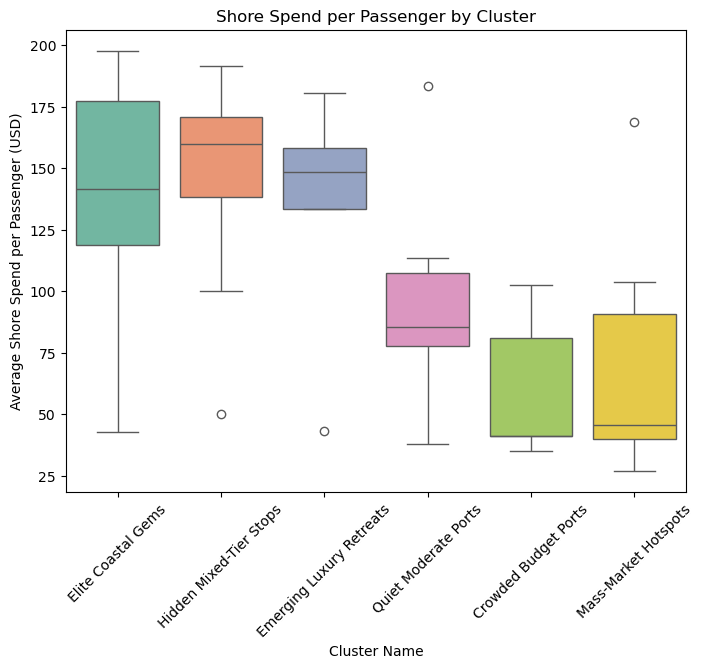

In [24]:
# box plot shore spend per passenger by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster_name', y='avg_shore_spend_per_passenger', data=df,
            hue='cluster_name', palette='Set2')
plt.title('Shore Spend per Passenger by Cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Average Shore Spend per Passenger (USD)')
plt.xticks(rotation=45)
plt.show()

*This boxplot compares shore excursion spending (USD) across 6 named clusters which we have named as per our previous analysis, so here are our analysis on it:*
**Elite Coastal Gems**
- *Highest median shore spend (~$150–175), wide IQR, and some very high outliers, as the passengers spend heavily here — these are **top-tier, high-margin ports**.*
-  ***Ideal for luxury cruise investment**.*
  
**Hidden Mixed-Tier Stops**
- *They also high median spend (~$150) but lesser than Elite Coastal Cluster, but with more variance.*
- *It indicates diverse traveler behaviors, hence, the name is Hidden mixed tier stope as this consists of some luxury spenders, some average.*
- *Ideal for **semi luxury cruise** investment where the spending is not **too high, but the experience is top notch**.*

**Emerging Luxury Retreats**
- *Slightly lower median spending (~$140–150) than other two luxury clusters, with an tight IQR, and shows stable spending habit.*
- *Ideal for **semi-affluent** travelers looking for authenticity and calm.*

**Quiet Moderate Ports**
- *Moderate spend of (~$80 median), but with fewer outliers*
- *They might be mid-tier destinations with limited upscale appeal.*
- *Ideal to offer **bundled packages**, nature/culture excursions to **increase per-passenger yield**.*

**Crowded Budget Ports**
- *It has a Lower median of (~$50–60), and has tight IQR*
- *Decent spending passengers, little revenue upside.*
- *Ideal to **low-cost cruises only**, and to be used for **high volume**of customers.*

**Mass-Market Hotspots**
- *Similar low median (~$40–50), but slightly wider range than the budget cluster.*
- *The budget-oriented port for mass volume with lower spending budget.*
- I*deal for **family with less income** and wants to have a good family time.*

In [25]:
#Bar Plot (Number of Ports per Cluster)
ports_per_cluster = df.groupby('cluster_name').size().reset_index(name='port_count')
print("\nNumber of Ports per Cluster:")
print(ports_per_cluster)


Number of Ports per Cluster:
               cluster_name  port_count
0      Crowded Budget Ports           5
1        Elite Coastal Gems           8
2  Emerging Luxury Retreats           5
3   Hidden Mixed-Tier Stops          12
4      Mass-Market Hotspots           9
5      Quiet Moderate Ports           6


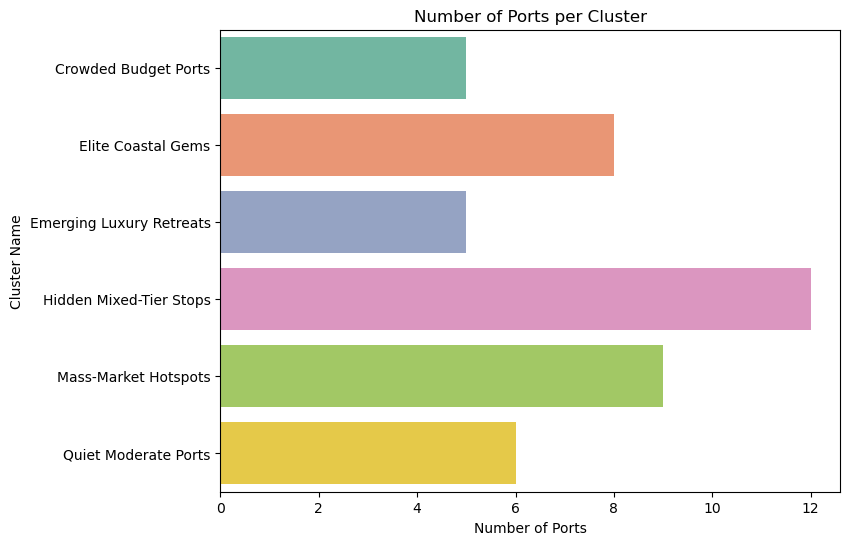

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x='port_count', y='cluster_name', data=ports_per_cluster, hue='cluster_name', palette='Set2')
plt.title('Number of Ports per Cluster')
plt.xlabel('Number of Ports')
plt.ylabel('Cluster Name')
plt.show()

*This plot represents the number of ports which are suitable for the luxurious and the affordable cruise lines. As our main focus is to make the cruise line luxurious, we will be mainly focusing: **Elite Coastal Gems** with **8 ports**, **Emerging Luxury Retreats** with **5 ports** and **Hidden Mixed-Tier** Stops with **12 ports**.*

### **Marketing Strategy for all the clusters**

**Elite Coastal Gems:** *We can position these ports as **exclusive**, **luxury destinations** with **private excursions**, **gourmet culinary tours**, or **yacht-like sailing experiences**. If we emphasize limited availability and exclusivity then this will be a spot on lines for the luxurious people.*

**Hidden Mixed-Tier Stops:** *We can promote authentic, **off-the-beaten-path experiences** — like cultural immersions or historical walking tours. It will c*ater to both **mid- and high-spend travelers** by offering tiered excursion packages.

**Emerging Luxury Retreats:** *We can market these as **"undiscovered gems"** ideal for sophisticated travelers. It will highlight **tranquility**, **natural beauty**, and **wellness-focused shore excursions**.*

**Quiet Moderate Ports:** *We can focus on **peace, nature, and family-friendly value**. We can offer them with **bundled cultural + nature excursions** to increase average spend.*

**Crowded Budget Ports:** *We can use volume-based deals like **“2-for-1” shore packages or group discounts.** We can also partner with local businesses for affordable but engaging quick excursions.*

**Mass-Market Hotspots:** *These ports are their to drive revenue through **pre-booked upsells**. This can grasp people who are attracted to deals and good packages.*

### **Strategic Recommendation to Lobster Land Voyage**

**Based on our segmentation, here’s how we would prioritize clusters:**

1. **Elite Coastal Gems** — **Pillars of the Voyage**
- *These ports are the crown jewels — low foot traffic, high passenger spend, and strong alignment with a luxury narrative.*
- *They don’t just offer shore excursions — they offer status, and unforgettable experiences.*
- *We can secure **exclusive partnerships at these ports** and make them the anchor points of the itinerary and **market them as exclusive and only for limited people.***

2.  **Hidden Mixed-Tier Stops — Can be a Signature destination of Lobster Land Voyage**
- *These ports may not be on every map, and that’s the point. They’re **mysterious, customizable, and positioned perfectly for surprise-and-delight**.*
- *They obviously would require more **effort** — but this can be our chance to make our **guests feel like explorers, not just tourists.***
- *We can curate an elevated and unique experiences.*

3. **Emerging Luxury Retreats** — **Steady, Scalable, and Smart**
- They offer high spend potential with moderate traffic — a great balance of Return on Investment and customer satisfaction.
- We can use these to smooth cost curves while still delivering a **premium feel.**
- *It will highlight **tranquility**, **natural beauty**, and **wellness-focused shore excursions**.*

### **Tradeoffs to Consider**

1. **Exclusivity vs. Accessibility:** *High-end ports often have limited berths, smaller docking facilities, or higher port fees, but in return, these costs pay off in guest loyalty and word-of-mouth marketing. We will gain the* ***brand equity of offering what mass-market cruises can’t.***

2. **High Shore Spend vs. Low Operating Cost:** *Clusters like **Elite Gems** and **Hidden Mixed-Tier** yield higher passenger revenue, but they come with higher excursion costs, port fees, and operational complexity. Whereas, **Lower-cost ports (Clusters 4, 5 & 6) reduce fixed costs**, but passenger spend is minimal. Hence, Spending more per port is justified if it translates into higher perceived value and revenue per guest. The key is to maximize Return on Investment, not minimize expenses, as minimizing expense might hamper the quality of the service and if we want to keep our brand value entact then focusing more on ROI is better than lowering our expense cost.*

## **III. Conjoint Analysis**

In [27]:
df1 = pd.read_csv("/Users/prathamkabra/Downloads/voyage_options.csv")
df1.head()

,entertainment,dining,cabin,amenities,cocktail_credits,avg_rating
0,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Top Deck Hot Tubs,1,8.313079
1,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Top Deck Hot Tubs,2,9.435885
2,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Top Deck Hot Tubs,3,8.540985
3,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Winter Wellness Spa,1,8.415454
4,East Coast Folk,Maine Lobster Nova Scotia Seafood Buffet,Cozy with Fireplace,Winter Wellness Spa,2,9.241294


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entertainment     576 non-null    object 
 1   dining            576 non-null    object 
 2   cabin             576 non-null    object 
 3   amenities         576 non-null    object 
 4   cocktail_credits  576 non-null    int64  
 5   avg_rating        576 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 27.1+ KB


In [29]:
ratings_input = pd.get_dummies(df1, drop_first = True,
                               columns = ['entertainment', 'dining', 'cabin', 'amenities', 'cocktail_credits'])

ratings_input.head()

,avg_rating,entertainment_DJ_Dance,entertainment_East Coast Folk,entertainment_Jazz Blues,dining_Coastal Tapas & Tasting Stations,dining_Formal Multi-Course Plated,dining_Maine Lobster Nova Scotia Seafood Buffet,cabin_Modern Minimalist,cabin_Nautical Chic,cabin_Romantic Escape,amenities_Top Deck Hot Tubs,amenities_Winter Wellness Spa,cocktail_credits_2,cocktail_credits_3
0,8.313079,False,True,False,False,False,True,False,False,False,True,False,False,False
1,9.435885,False,True,False,False,False,True,False,False,False,True,False,True,False
2,8.540985,False,True,False,False,False,True,False,False,False,True,False,False,True
3,8.415454,False,True,False,False,False,True,False,False,False,False,True,False,False
4,9.241294,False,True,False,False,False,True,False,False,False,False,True,True,False


In [30]:
ratings_input.columns

Index(['avg_rating', 'entertainment_DJ_Dance', 'entertainment_East Coast Folk',
       'entertainment_Jazz Blues', 'dining_Coastal Tapas & Tasting Stations',
       'dining_Formal Multi-Course Plated',
       'dining_Maine Lobster Nova Scotia Seafood Buffet',
       'cabin_Modern Minimalist', 'cabin_Nautical Chic',
       'cabin_Romantic Escape', 'amenities_Top Deck Hot Tubs',
       'amenities_Winter Wellness Spa', 'cocktail_credits_2',
       'cocktail_credits_3'],
      dtype='object')

In [31]:
X = ratings_input[['entertainment_DJ_Dance', 'entertainment_East Coast Folk',
       'entertainment_Jazz Blues', 'dining_Coastal Tapas & Tasting Stations',
       'dining_Formal Multi-Course Plated',
       'dining_Maine Lobster Nova Scotia Seafood Buffet',
       'cabin_Modern Minimalist', 'cabin_Nautical Chic',
       'cabin_Romantic Escape', 'amenities_Top Deck Hot Tubs',
       'amenities_Winter Wellness Spa', 'cocktail_credits_2',
       'cocktail_credits_3']]
y = ratings_input['avg_rating']

In [32]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [33]:
coef_ratings = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_ratings

,Coefficient
entertainment_DJ_Dance,-0.697778
entertainment_East Coast Folk,0.444300
entertainment_Jazz Blues,0.355375
dining_Coastal Tapas & Tasting Stations,0.292936
dining_Formal Multi-Course Plated,-0.768749
dining_Maine Lobster Nova Scotia Seafood Buffet,1.497222
cabin_Modern Minimalist,-0.449679
cabin_Nautical Chic,0.312436
cabin_Romantic Escape,0.032533
amenities_Top Deck Hot Tubs,0.902993


### **Conjoint Analysis**

We used a linear regression model to conduct a ratings-based conjoint analysis, aiming to identify the best combination of onboard entertainment and amenities to provide the most enjoyable experience for passengers.

**Entertainment:**  
Among all entertainment options, DJ Dance had a coefficient of about -0.698, indicating a significant negative impact on passenger ratings. In contrast, East Coast Folk (+0.444) and Jazz Blues (+0.355) had positive coefficients, suggesting that these live music performances were more favored compared to the baseline. This shows that Lobster Land passengers tend to prefer warm, traditional musical experiences rather than nightclub-style activities.

**Dining Experience:**  
The Maine Lobster Nova Scotia Seafood Buffet had the highest coefficient (+1.497), far above the other dining options. This suggests that the buffet, with its rich seafood offerings and casual format, fits the cruise theme well and is highly appreciated by travelers. Tapas & Tasting Stations also had a slight positive impact (+0.293), while the Formal Multi-Course Plated Dinner had a strong negative impact (-0.769), possibly because formal dining may feel out of place on a short cruise.

**Cabin Atmosphere:**  
For cabin style, Nautical Chic (+0.312) was the most preferred, likely due to its maritime theme and upscale comfort. Modern Minimalist had a negative coefficient (-0.450), suggesting that this style is not well received in the cruise setting. Romantic Escape had a near-zero coefficient, meaning it had little effect on passenger ratings.

**Onboard Amenities:**
Top Deck Hot Tubs stood out with a high coefficient (+0.903), showing that it is a favorite among passengers. On the other hand, Winter Wellness Spa had a minimal impact (+0.078), indicating that although it is liked, it may not be a key factor in overall satisfaction.

**Cocktail Credits:**
The number of cocktail credits also influenced ratings. Two credits had a strong positive effect (+0.426), while three credits actually lowered ratings (-0.533). This suggests that passengers may prefer a moderate amount of perks, and offering too many might reduce the perceived value or create unrealistic expectations.

### **Recommended Bundle and Cost Analysis**

If we only wanted to maximize ratings, the ideal combination would be:
- **Entertainment:** East Coast Folk  
- **Dining:** Maine Lobster Nova Scotia Seafood Buffet  
- **Cabin:** Nautical Chic  
- **Amenities:** Top Deck Hot Tubs
- **Cocktail Credits:** 2 credits

However, this combination costs 85.5 dollars, which exceeds the $75 budget limit. To stay within budget while keeping the ratings high, we recommend this alternative bundle:
- **Entertainment:** Acoustic Showcase
- **Dining:** Maine Lobster Nova Scotia Seafood Buffet
- **Cabin:** Nautical Chic
- **Amenities:** Top Deck Hot Tubs
- **Cocktail Credits:** 2 credits

Switching from East Coast Folk to Acoustic Showcase only sacrifices 0.444 points in ratings but saves $13. This makes the final package affordable and still appealing.

**Implications for Future Product and Marketing Strategy:**  
This conjoint analysis provides useful insights for Lobster Land’s future offerings. For example, passengers clearly favor experiences like seafood buffets, so these can be highlighted in future product design and marketing. On the other hand, options like the Formal Multi-Course Dinner that received lower ratings could be revised or gradually removed. This analysis also supports more flexible combinations in the future. For different types of passengers or cruise themes, elements can be adjusted based on popularity and cost to improve overall satisfaction at Lobster Land.